<a href="https://colab.research.google.com/github/YmagineMax/ML-Project/blob/main/co2_emissions_in_rwanda_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍📚 Predicting CO^2 emissions in Rwanda 🇷🇼

## 🔴1. Problem definition 🔴
How well can we predict future CO^2 emissions in Rwanda, given it's characteristics and previous measurement from Sentinel-5P sattelite.

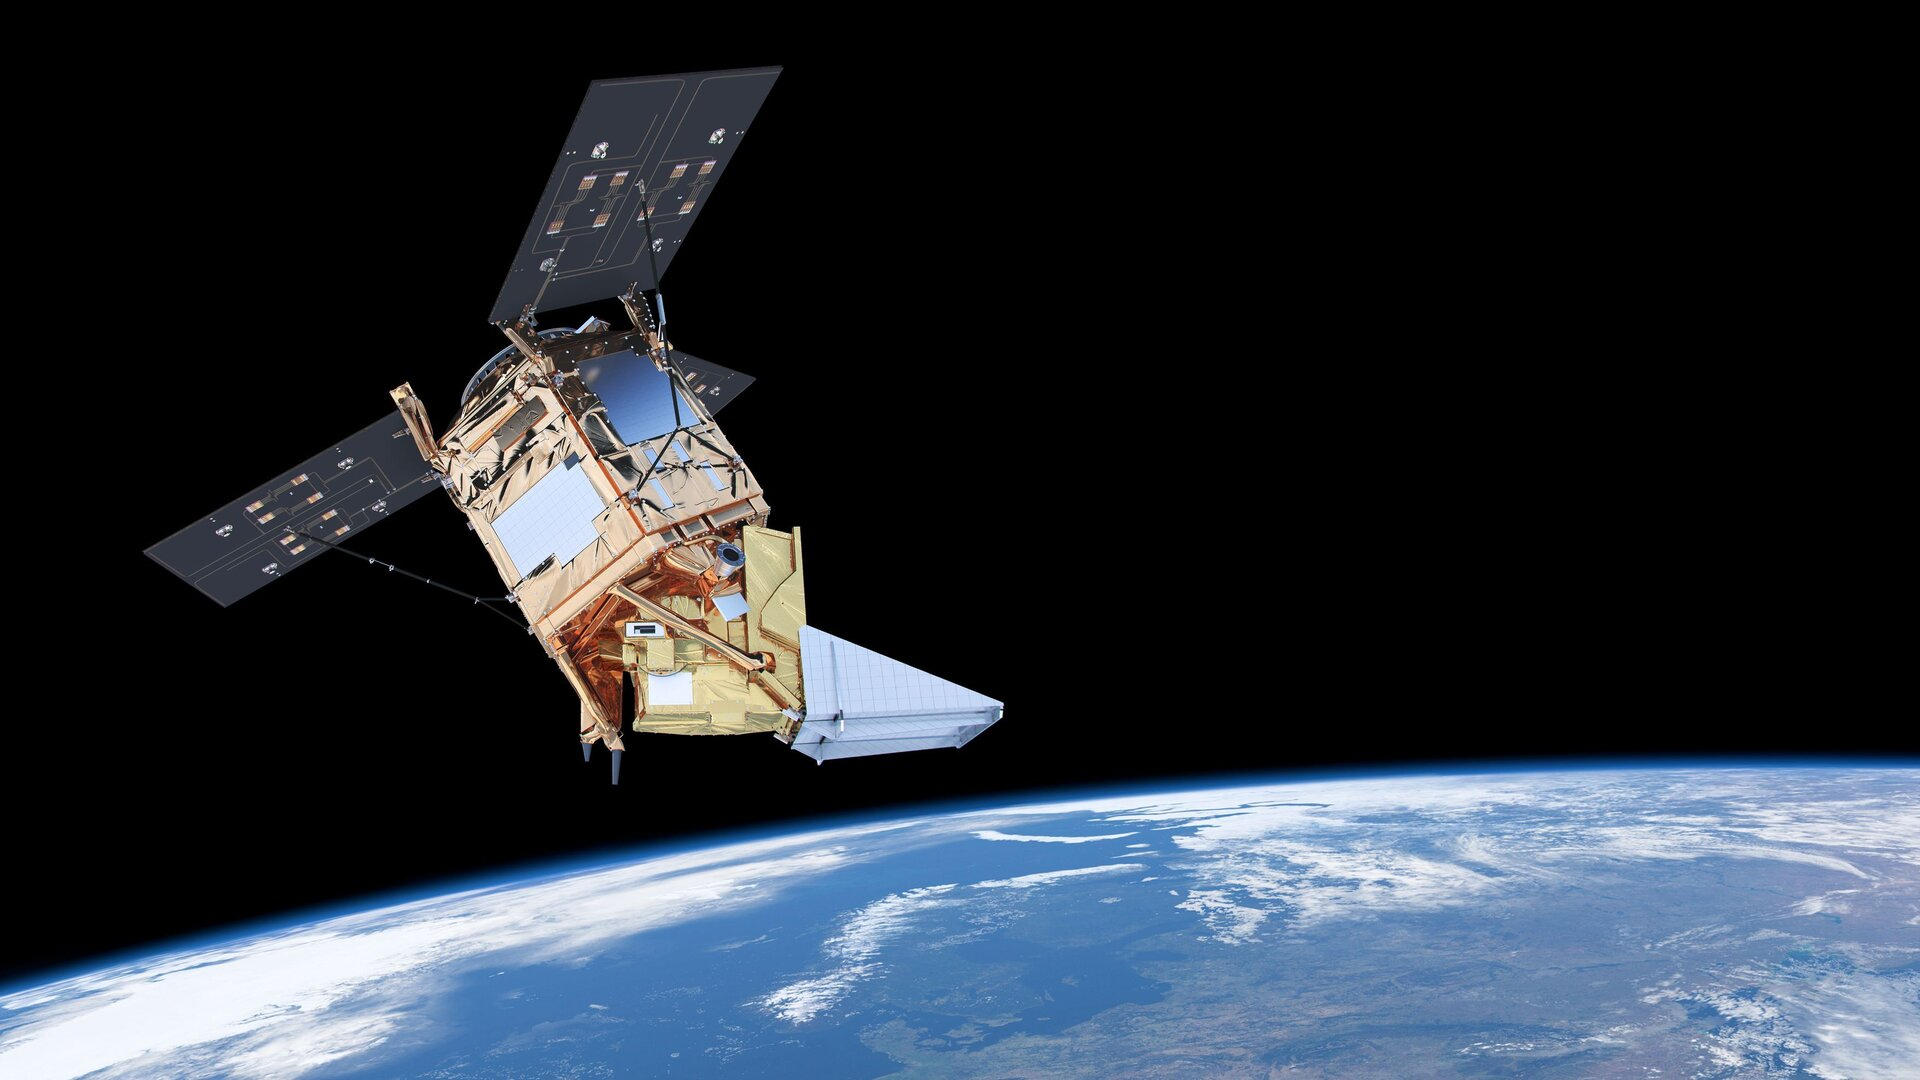


## 🧮 2. Data 🧮
Data is provided from Kaggle (https://www.kaggle.com/competitions/playground-series-s3e20/)

Data is split into:

train.csv - which is used to train our ML model, which contains the years 2019 - 2021

test.csv - which is used to test performance of our ML model for 2022 through November


### 📉 3. Evaluation 📈
To evaluate our machine learning model we will use RMSE (Root Mean Squared Error)

## 🔍 4. Features 🔍
Data set provides us with:

ID - Identification of measurement taken

Latitude - Geographical latitude of a measurement

Longitude - Georaphical longitude of a measurement

Year - Year in which measurement took place

Week - Week in which measurement took place

SO2 - features (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_SO2?hl=en)

Carbon Monoxide - features (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_CO?hl=en)

Nitrogen Dioxide - features (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_NO2?hl=en)

Formaldehyde - features (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_HCHO?hl=en)

UV Aerosol Index - features (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_AER_AI?hl=en)

Ozone - features (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_O3?hl=en)

Cloud - features (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_CLOUD?hl=en)


Emission - which is recorded CO2 level

## 📦 5. Importing libaries 📦
To visualize data, create, train and evaluate machine learning model.

In [ ]:
import geopandas as gpd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from math import radians, cos, sin, asin, sqrt

In [ ]:
#Before all of that let's create a seed! So our results is reproducable.
SEED = 2308
np.random.seed(SEED)

## 🧐 6. EDA 🧐

Let's do some EDA to check out what's going on in this dataframes - by doing that we can gather insights to make our model work better!


Let's start with importing a data.

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/CO2_Rwanda/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/CO2_Rwanda/test.csv")


In [ ]:
train_df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [ ]:
test_df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [ ]:
# Let's check the shape of the both data frames
train_df.shape, test_df.shape

((79023, 76), (24353, 75))

All of the data is fine - ***test*** data frame got one less columns than ***train*** data frame due to the missing emission target we need to predict.

## 📊 6.0.1 Emission Distribution 📊

We are now going to look at the distribution of the **CO^2 emission**.

[]

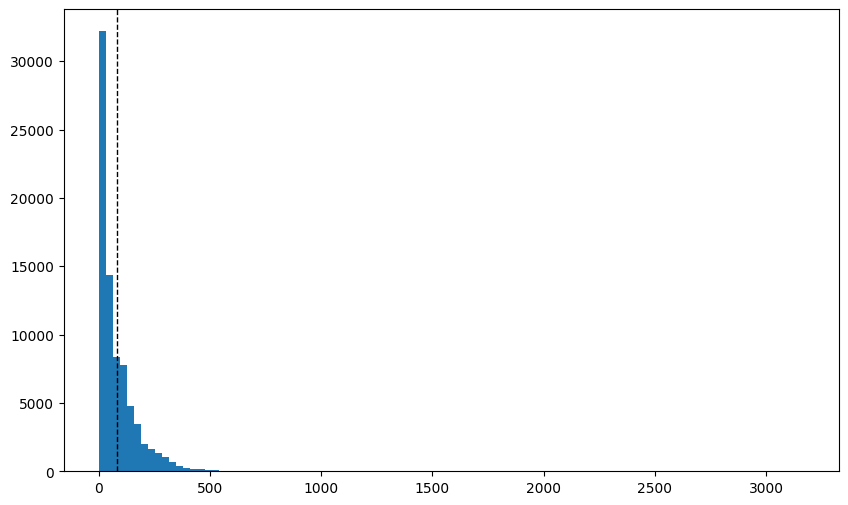

In [ ]:
#Create a figure

fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(train_df["emission"], bins = 100)
plt.axvline(train_df["emission"].mean(), color = "k", linestyle = "dashed", linewidth = 1)

#Plot Emission Distribution

plt.plot()

### The dotted line shows us the mean of the values

### 🔢 6.1 Data Types in our data frame 🔢

We need to know how many columns have numerical values and non-numerical values. To train a ML model we need to have it all numerical.

In [ ]:
# Let's check data types for train_df
train_df.info()
# They are all numerical expect ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [ ]:
# Checking the ratio of train to test data frame.
(test_df.shape[0]) / (train_df.shape[0] + test_df.shape[0])

0.23557692307692307

Conclusion:
* All of the data is numerical expect first column which is ID. We'll drop it for training our ML model.
* Ratio is 0.23, which is good.


### 🔍🧮 6.2 Descriptive statistics of a DataFrame 🔍🧮
A look into statistics of our each of the column, this helps us understand it better.

In [ ]:
train_df.describe(include = "all")

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
unique,79023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-0.510_29.290_2019_00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,NaN,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,NaN,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,NaN,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,NaN,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,NaN,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595


Conclusions:
* Mean emission is ~82
* Maximum emission recorded on this data frame is 3167
* Minimum emission recorded on this data frame is 0.0


### ❓ 6.2 Missing values ❓
Checking how many missing values do we have in our data. We need to do something with it unless we want our ML model perform worse.

In [ ]:
nan_values_train = pd.DataFrame(train_df.isna().sum())
nan_values_train

,0
ID_LAT_LON_YEAR_WEEK,0
latitude,0
longitude,0
year,0
week_no,0
...,...
Cloud_sensor_azimuth_angle,484
Cloud_sensor_zenith_angle,484
Cloud_solar_azimuth_angle,484
Cloud_solar_zenith_angle,484


In [ ]:
nan_values_test = pd.DataFrame(test_df.isna().sum())
nan_values_test

,0
ID_LAT_LON_YEAR_WEEK,0
latitude,0
longitude,0
year,0
week_no,0
...,...
Cloud_surface_albedo,166
Cloud_sensor_azimuth_angle,166
Cloud_sensor_zenith_angle,166
Cloud_solar_azimuth_angle,166


## 📊 6.1.2 Visualaizing missing values 📊

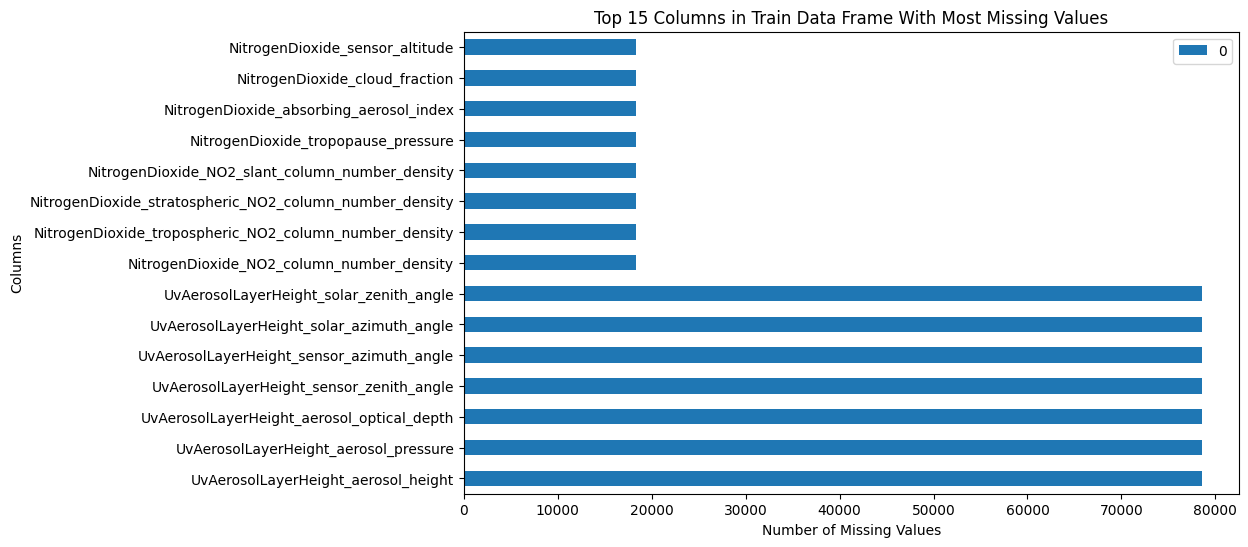

In [ ]:
top_train_df_missing_columns = nan_values_train.nlargest(15, 0)

fig, ax = plt.subplots(figsize=(10, 6))
top_train_df_missing_columns.plot(kind='barh', ax=ax)

# Adding labels and title
ax.set_xlabel('Number of Missing Values')
ax.set_ylabel('Columns')
ax.set_title('Top 15 Columns in Train Data Frame With Most Missing Values')


plt.show()


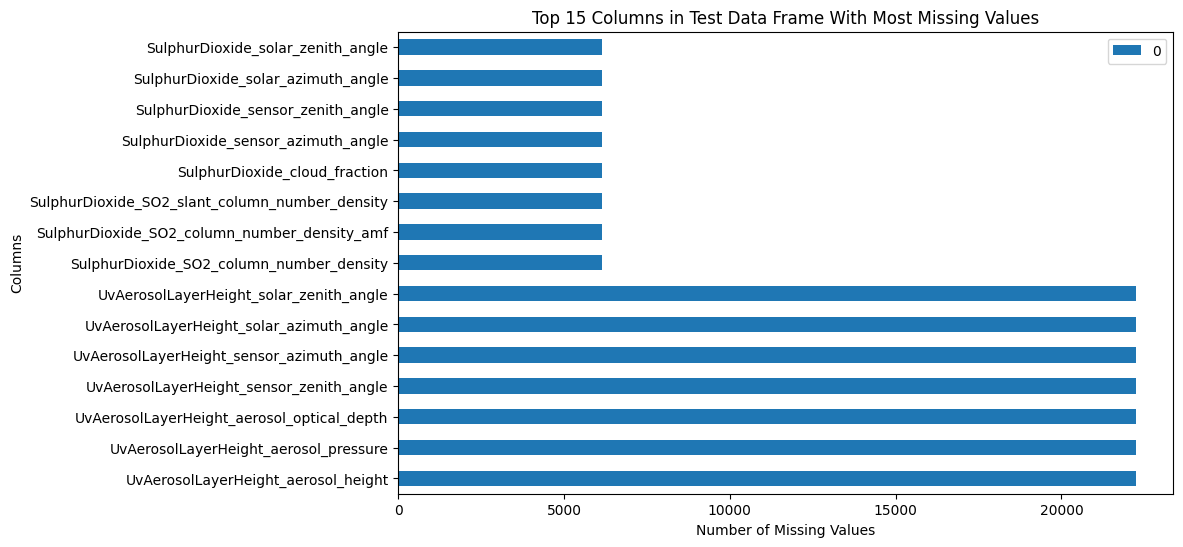

In [ ]:
top_test_df_missing_columns = nan_values_test.nlargest(15, 0)

fig, ax = plt.subplots(figsize=(10, 6))
top_test_df_missing_columns.plot(kind='barh', ax=ax)

# Adding labels and title
ax.set_xlabel('Number of Missing Values')
ax.set_ylabel('Columns')
ax.set_title('Top 15 Columns in Test Data Frame With Most Missing Values')


plt.show()

How are we going to deal with missing values? There are few ways to do it, for example:
* We can fill the missing values with mode, median or mean
* Drop missing values

### 🌐🌏 6.2 Geo-referenced Plot 🌐🌏
Let's visualize measurements on the map!

<ipython-input-16-a7a87f6f12c8>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


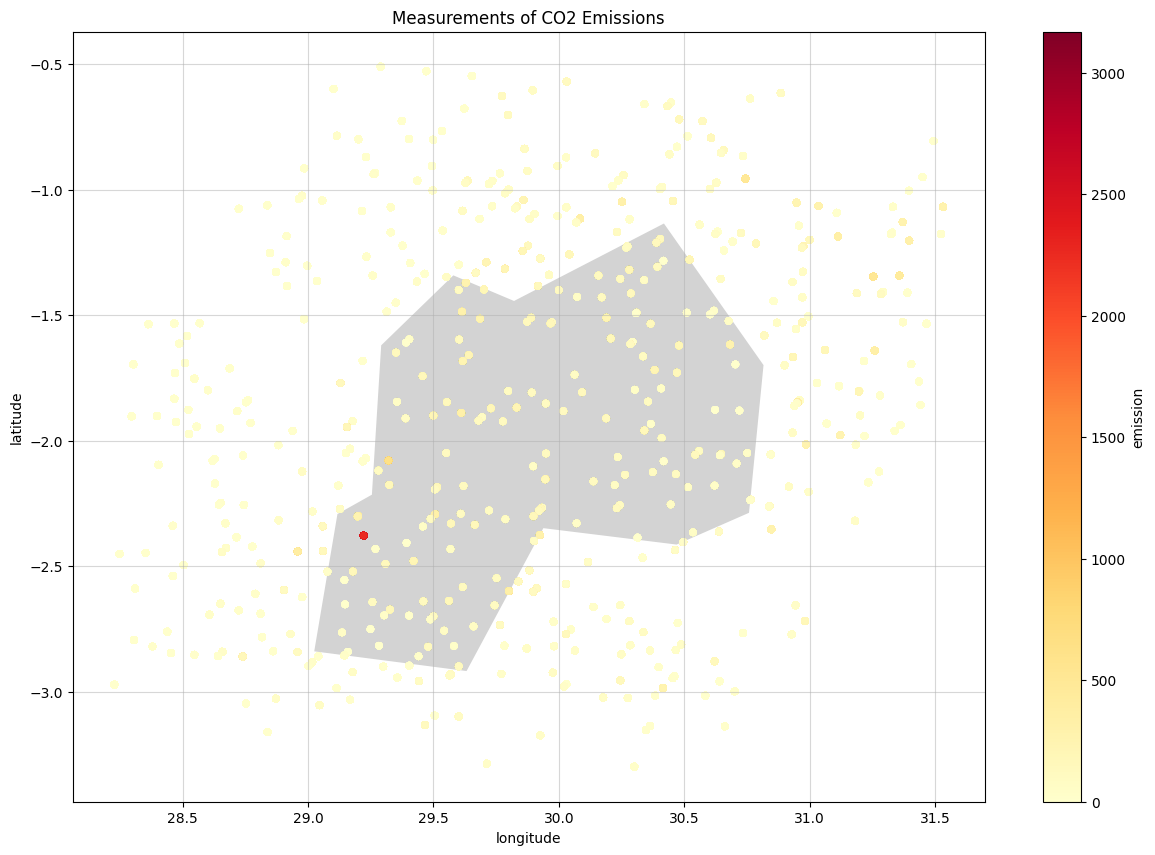

In [ ]:
# Let's check where measurements on train set took place and emissions in specific areas

map = pd.read_csv("/content/drive/MyDrive/CO2_Rwanda/train.csv", usecols = ["latitude", "longitude", "emission"])

#Plot the map
fig, ax = plt.subplots(figsize=(15,10))

countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Rwanda"].plot(color="lightgrey", ax = ax)

map.plot(x="longitude", y="latitude", kind="scatter",
        c="emission", colormap="YlOrRd",
        title=f"Measurements of CO2 Emissions",
        ax=ax)

ax.grid(alpha=0.5)


plt.show()


Note: I did some research and that red point on the map is near "Karengara" known region for mining uranium due to the low-medium mining technologies used in Africa it might have effect on emissions. Maybe I'll include it in pre-processing. Also there's a 9 Industrial parks in Bugesera, Rwamagana, Muhanga, Nyagatare, Musanze, Huye, Nyabihu, Rusizi, and Kicukiro.

### As we can see there is a lot of the measurements outside of the borders of Rwanda

Let's see the test data frame, maybe we'll need to delete those outside the borders of Rwanda to get better scores of our ML model.

<ipython-input-17-98eb1f05df76>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


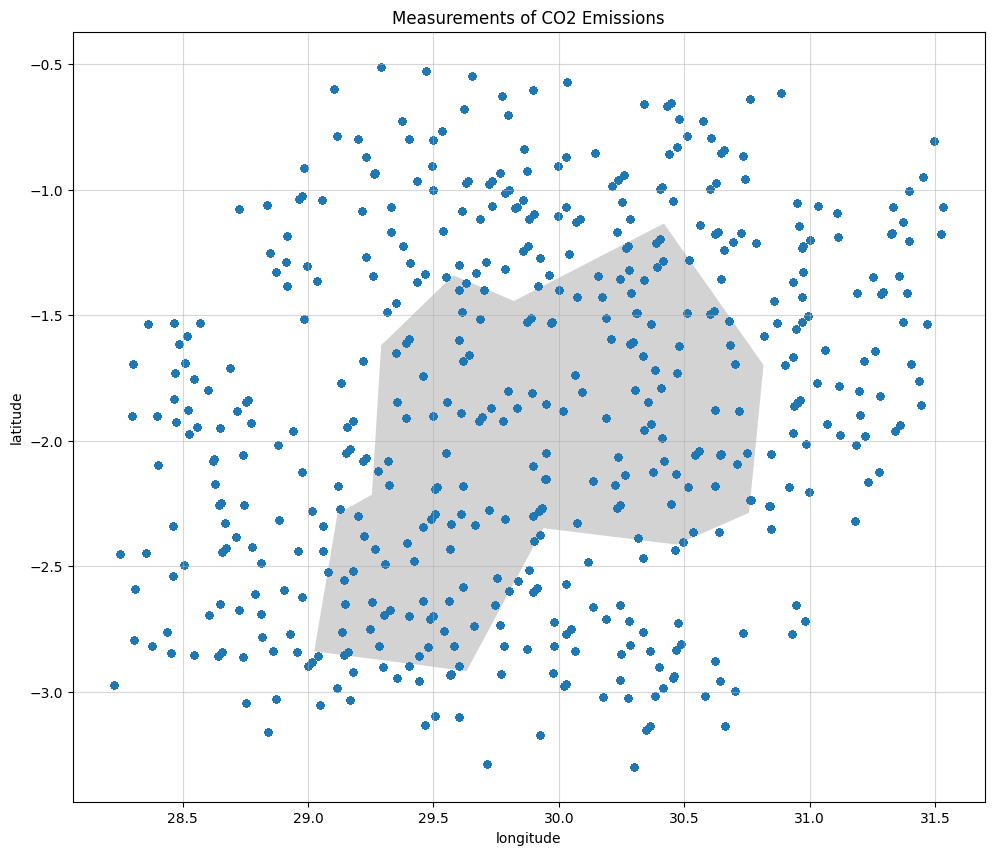

In [ ]:
# Let's check where measurements on test set took place

map = pd.read_csv("/content/drive/MyDrive/CO2_Rwanda/test.csv", usecols = ["latitude", "longitude"])

fig, ax = plt.subplots(figsize=(15,10))

countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Rwanda"].plot(color="lightgrey", ax = ax)

map.plot(x="longitude", y="latitude", kind="scatter", colormap="YlOrRd",
        title=f"Measurements of CO2 Emissions",
        ax=ax)

ax.grid(alpha=0.5)

plt.show()

### It is more or less comparable so we do not have to exclude mesurements outside of the borders of Rwanda.

## 📊 6.3 Outliers - Emission 📊


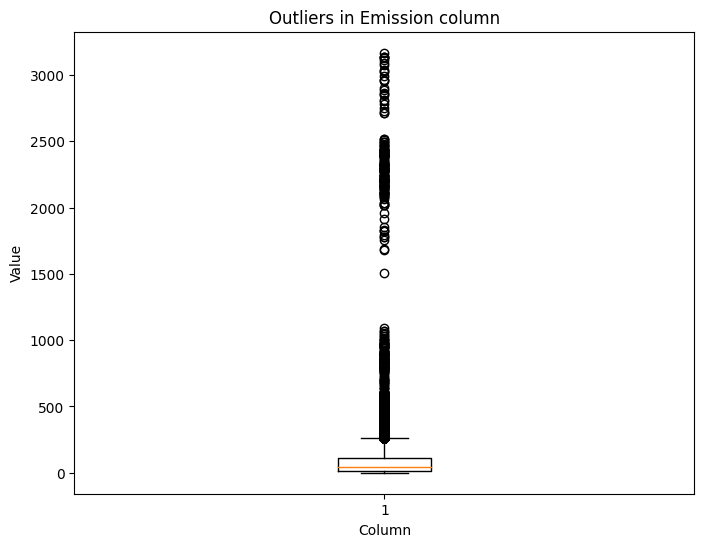

In [ ]:
#Outliers in Emission column

#Plotting
plt.figure(figsize = (8,6))
plt.boxplot(train_df["emission"])
plt.title("Outliers in Emission column")
plt.xlabel("Column")
plt.ylabel("Value")

#Display a plot
plt.show()

## 🔗🧮🔍6.4 Correlection Matrix 🔗🧮🔍


<ipython-input-19-7f92d9f0aff4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top20_corrs = abs(train_df.corr()['emission']).sort_values(ascending = False).head(20)


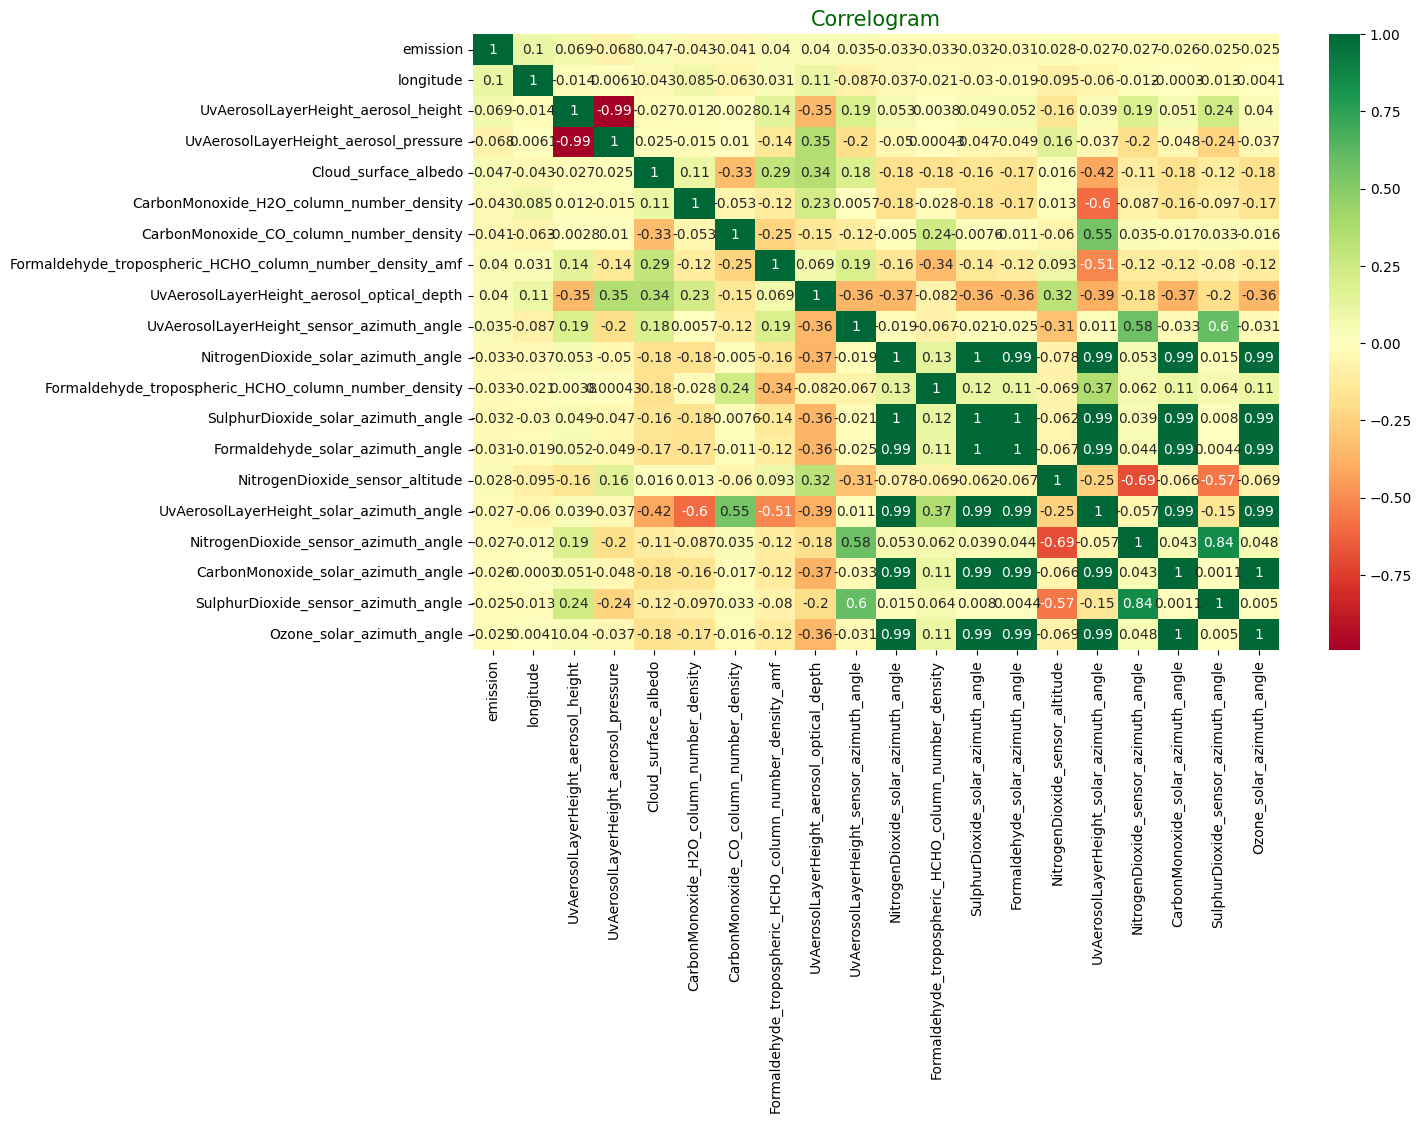

In [ ]:
#Creating a variable containing a top 20 correlactions
top20_corrs = abs(train_df.corr()['emission']).sort_values(ascending = False).head(20)
top20_corrs

corr = train_df[list(top20_corrs.index)].corr()

# Ploting the Correlection Matrix
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()


## 📈⏳ 6.5 Time-series📈⏳

Now it's the time to look up

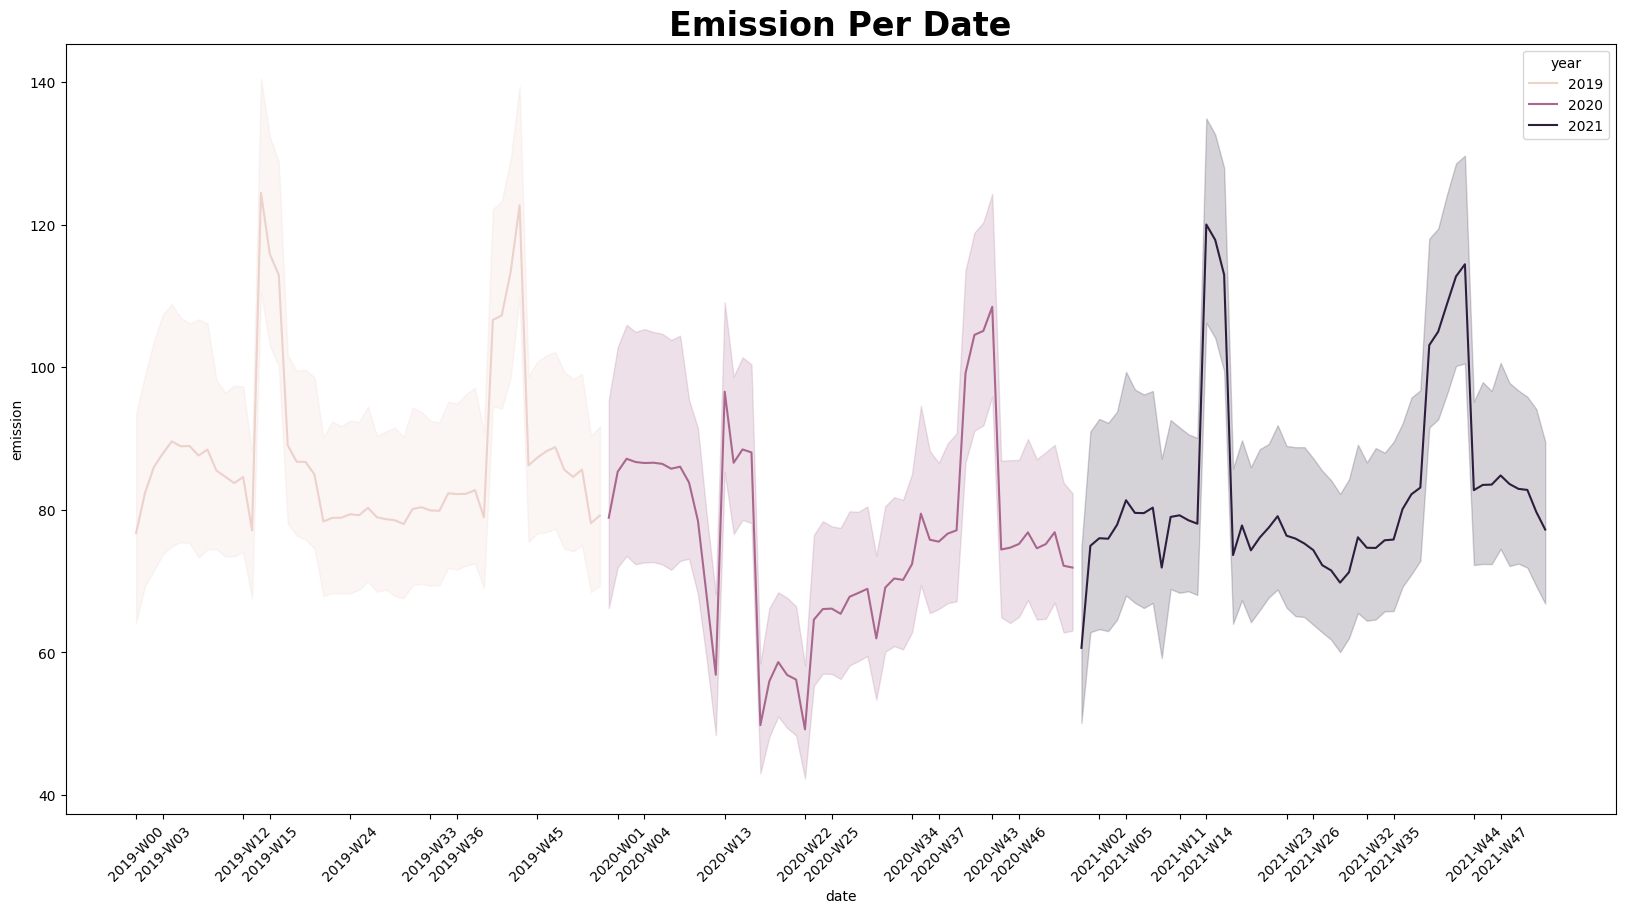

In [ ]:
# We'll need to create a week + year column and parse it so Pandas can read it
time_series_df = train_df.copy()
time_series_df["date"] = time_series_df.apply(lambda row: f"{row['year']}-W{row['week_no']:02}", axis=1)

#Plot the time series with emission
fig, ax = plt.subplots(figsize = (20, 10))
sns.lineplot(data = time_series_df, x = "date", y = "emission", hue = "year")


#Customize it so it's more readable
x_ticks = time_series_df["date"].iloc[::3000]
ax.set_xticks(x_ticks)
plt.xticks(rotation = 45)
plt.title('Emission Per Date', fontsize = 24, fontweight = 'bold')


plt.show()

### Alright, we can clearly see COVID influance in 2020 on our training data frame, we can handle them in the following way:


* Drop COVID 2020 year out of training data frame
* Normalize/standarize data
* Create a binary column "isCovidYear" - False/True

But we also can check emission change percent.

In [ ]:
emissions_dict = {}

for index, row in train_df.iterrows():
    if row["year"] in [2019, 2020, 2021]:
      if row["year"] in emissions_dict:
        emissions_dict[row["year"]] += row["emission"]
      else:
        emissions_dict[row["year"]] = row["emission"]

emissions_percent_change = {}
years = list(emissions_dict.keys())

for i in range(1, len(years)):
    year = years[i]
    prev_year = years[i - 1]
    percent_change = ((emissions_dict[year] - emissions_dict[prev_year]) / emissions_dict[prev_year]) * 100
    emissions_percent_change[year] = percent_change

print(emissions_percent_change)

{2020: -12.908319381316854, 2021: 8.661549390194182}


As we can see there's ~10% diffrence, we can multiply data by that 10% to make sure that 2020 COVID year influance is decreased.

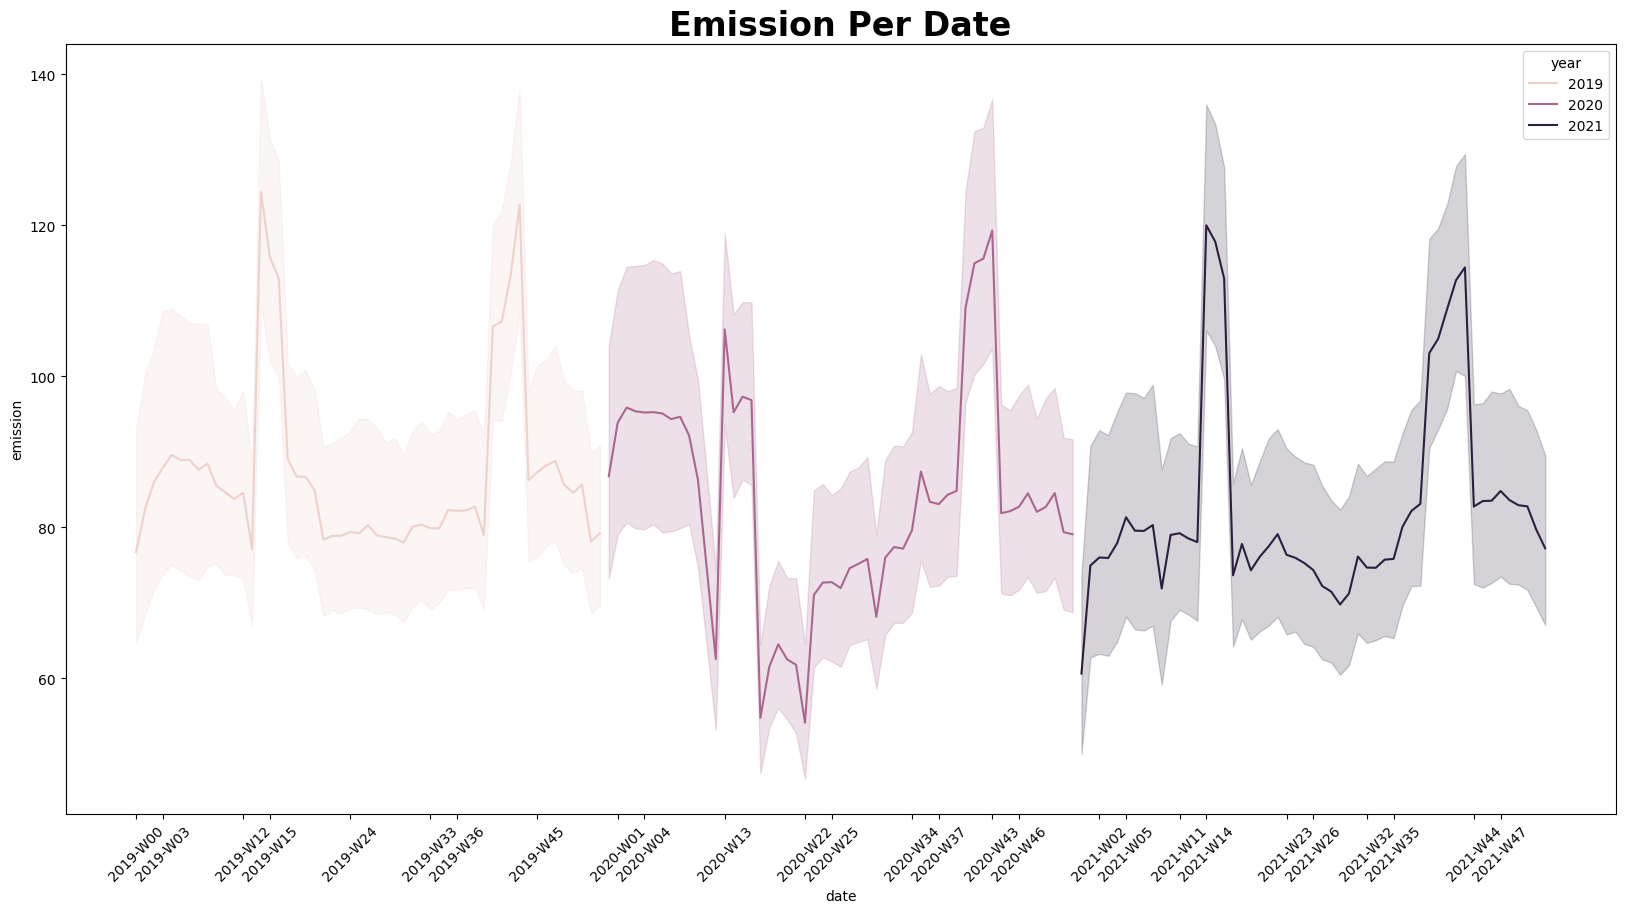

In [ ]:
# We'll need to create a week + year column and parse it so Pandas can read it
time_series_df = train_df.copy()
time_series_df.loc[time_series_df["year"] == 2020, "emission"] *= 1.10
time_series_df["date"] = time_series_df.apply(lambda row: f"{row['year']}-W{row['week_no']:02}", axis=1)

#Plot the time series with emission
fig, ax = plt.subplots(figsize = (20, 10))
sns.lineplot(data = time_series_df, x = "date", y = "emission", hue = "year")


#Customize it so it's more readable
x_ticks = time_series_df["date"].iloc[::3000]
ax.set_xticks(x_ticks)
plt.xticks(rotation = 45)
plt.title('Emission Per Date', fontsize = 24, fontweight = 'bold')

plt.show()

I do not think that is good idea to be fair - but worth a try while experimanting.

### 🌍 Emission per location 🌍
Now we are going to check how diffrent emissions are in given place

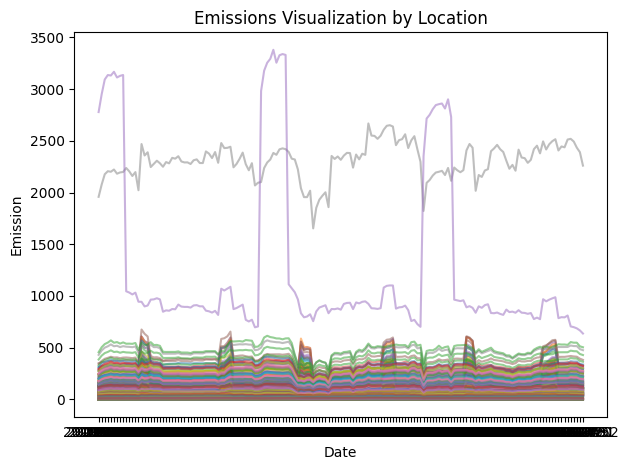

In [ ]:
grouped = time_series_df.groupby(['longitude', 'latitude'])

for (lon, lat), group_df in grouped:
    plt.plot(group_df['date'], group_df['emission'], label=f"Lon: {lon}, Lat: {lat}", alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Emission')
plt.title('Emissions Visualization by Location')
plt.tight_layout()
plt.show()


## 🔧 7. Preprocessing our data 🔧

Well let's get right into it, here's what we are going to do:
1. Create binary column for the COVID year
2. Create binary column for industrial areas (we will specify where are they located with longitude and latitude) List of those areas: Karengara and 9 Industrial parks in Bugesera, Rwamagana, Muhanga, Nyagatare, Musanze, Huye, Nyabihu, Rusizi, and Kicukiro.
3. Create cosinus and sinus columns of the weeks to capture any cyclic or periodic patterns that might be present in the data.
4. Remove any missing values with median of the column

In [ ]:
#Creating industrial areas location
industrial_areas = [
    {"name": "Karengera", "latitude": -2.516850, "longitude": 29.031759},
    {"name": "Bugesera", "latitude": -1.669530, "longitude": 29.284470},
    {"name": "Rwamagana", "latitude": -1.951540, "longitude": 30.433680},
    {"name": "Muhanga", "latitude": -1.171650, "longitude": 30.125090},
    {"name": "Nyagatare", "latitude": -1.298632, "longitude": 30.329535},
    {"name": "Musanze", "latitude": -1.4745128, "longitude": 29.5692112},
    {"name": "Huye", "latitude": -2.6053426, "longitude": 29.7401547},
    {"name": "Nyabihu", "latitude": -1.6410685, "longitude": 29.5180538},
    {"name": "Rusizi", "latitude": -2.4887775, "longitude": 28.8958127},
    {"name": "Kicukiro", "latitude": -1.9854367, "longitude": 30.1036335}
]

def is_in_area(point, area):
    lat, lon = point
    lat_area = area["latitude"]
    lon_area = area["longitude"]
    # Calculate the distance using the haversine formula
    radius = 10  # 10 km radius
    dlat = radians(lat - lat_area)
    dlon = radians(lon - lon_area)
    a = sin(dlat / 2) ** 2 + cos(radians(lat_area)) * cos(radians(lat)) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    distance = 6371 * c  # Radius of Earth in kilometers
    return distance <= radius

In [ ]:
def preprocessing(df):
  """A function that preprocesses our data"""
  #Dropping ID - we will not use for training
  df.drop("ID_LAT_LON_YEAR_WEEK", axis = 1, inplace = True)

  #Creating a sinus & cosinus waves for our data
  df['week_sin'] = np.sin(2 * np.pi * (df['week_no']/53))
  df['week_cos'] = np.cos(2 * np.pi * (df['week_no']/53))

  #Filling missing values with median.
  df.fillna(df.median(), inplace=True)

  #Creating a binary column for industrial areas
  for area in industrial_areas:
    area_name = list(area.keys())[0]
    area_coords = area[area_name]
    df['industrial_area'] = df.apply(lambda row: any(is_in_area((row['latitude'], row['longitude']), area) for area in industrial_areas), axis=1)

  #Creating a binary column for COVID year
  df["isCovidYear"] = df["year"] == 2020


  return df



##🤖🔍 8. Modelling 🤖🔍
In this section, we'll choose baseline model for which we are going to tune hyperparameters and try to get the best results. We are going to do modelling on the splitted train data frame.

In [ ]:
preprocessing(train_df)

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,week_sin,week_cos,industrial_area,isCovidYear
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,0.000000,1.000000,False,False
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,0.118273,0.992981,False,False
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,0.234886,0.972023,False,False
3,-0.510,29.290,2019,3,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,0.348202,0.937420,False,False
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,0.456629,0.889657,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171,-0.558647,0.829406,False,False
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497,-0.456629,0.889657,False,False
79020,-3.299,30.301,2021,50,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205,-0.348202,0.937420,False,False
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792,-0.234886,0.972023,False,False


In [ ]:
#Spliting train data into X and y
X = train_df.drop("emission",axis = 1)
y = train_df["emission"]

#Splitting train data into X train, X test, y_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Instatacing models
models = {"lasso": Lasso(),
          "elasticnet": ElasticNet(),
          "rfr": RandomForestRegressor(),
          "gb": GradientBoostingRegressor(),
          "ridge": Ridge()
          }

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.343e+08, tolerance: 1.301e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.398e+08, tolerance: 1.301e+05
  model = cd_fast.enet_coordinate_descent(
<ipython-input-29-0ce29715e125>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_names, rotation = 45)


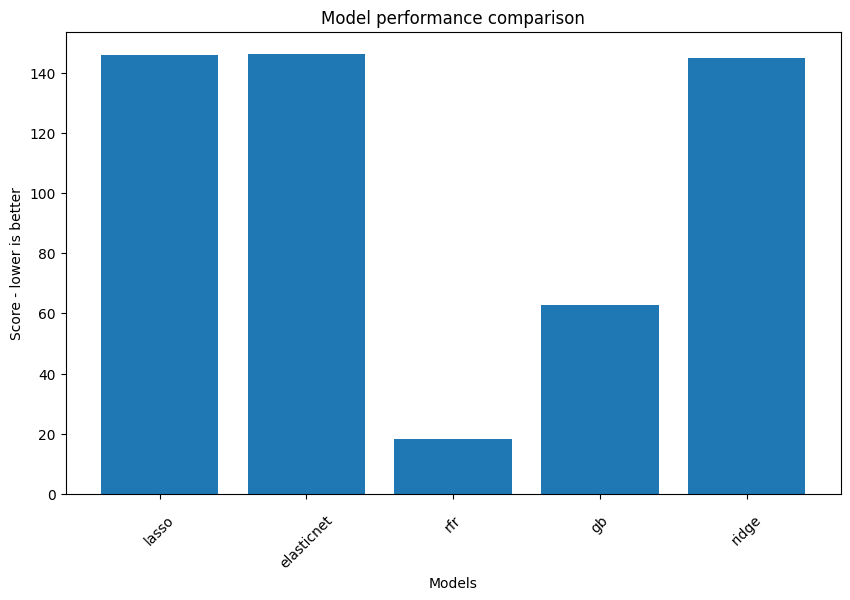

In [ ]:
#Creating empty dict to visualize all of the model scores

msre_values = {}

# Looping through models to get the best baseline model
for model_name, model_instance in models.items():
  model_instance.fit(X_train, y_train)
  y_preds = model_instance.predict(X_test)
  msre = mean_squared_error(y_test, y_preds, squared=False)
  msre_values[model_name] = msre

#Converting model names and scores to the list for easier plotting
model_names = list(msre_values.keys())
model_scores = list(msre_values.values())

#Visualize performance for each model
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(model_names, model_scores)
ax.set_xlabel("Models")
ax.set_ylabel("Score - lower is better")
ax.set_title("Model performance comparison")
ax.set_xticklabels(model_names, rotation = 45)
ax.tick_params(axis='x', which='major', pad=10)

plt.show()

In [ ]:
msre_values

{'lasso': 145.8206846863444,
 'elasticnet': 146.32780375477319,
 'rfr': 18.12249186928441,
 'gb': 62.69577598437273,
 'ridge': 145.03912909124378}

Even tough linear models didn't manage to get the greatest results it's casued by the data frame not being scaled.

## 🧮👍 8.1 Baseline model 🧮👍
We got a crazy good results for Random Forest Regressor - 18!

So we are going to stick with it! 😀

We are going to Cross validate this model to check it's performance even deeper. Maybe we got lucky?


In [ ]:
rfr = RandomForestRegressor()
cv_rmse = cross_val_score(rfr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
#Convert negative MSE scores to RMSE scores
rmse_cv_scores = np.sqrt(-cv_rmse)
print(f"Mean RMSE: {rmse_cv_scores.mean()}")
print(f"RMSE scores for each fold:{rmse_cv_scores}")



Mean RMSE: 20.786345362387575
RMSE scores for each fold:[23.50196538 18.82495974 23.45927288 20.82334759 17.32218122]


Code above took like 25min to load x) But better safe than sorry

Final 5CV gave us the result of ~20




## 🔍9. Fine tuning 🔍

So fitting a model with current X_train and X_test takes like ~10minutes. Before we can look for hyperparameters we need to do something about it.

We will use max samples to limit data that is needed to be fitted to only 5 000. We just need it to get the best parameters, after that we'll fit the ideal model (the one with the best parameters) on full data and test it on dataset.

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
param_grid = {
    'n_estimators': [100, 250, 500, 600],
    'min_samples_leaf': [1, 2, 4, 6, 9],
    'min_samples_split': [2, 4, 6, 9],
    'max_samples': [5_000],
}

gs_cv = GridSearchCV(rfr, param_grid = param_grid, cv = 5, scoring = 'neg_root_mean_squared_error', verbose = True)

gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_samples': [5000],
                         'min_samples_leaf': [1, 2, 4, 6, 9],
                         'min_samples_split': [2, 4, 6, 9],
                         'n_estimators': [100, 250, 500, 600]},
             scoring='neg_root_mean_squared_error', verbose=True)

As we can see chosen hyperparameters are the same one as baseline model. Let's continue with it then.

In [ ]:
gs_cv.best_params_

{'max_samples': 5000,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
gs_rfr = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2)
gs_rfr.fit(X_train, y_train)
y_preds = gs_rfr.predict(X_test)

In [ ]:
#Calculate RMSE
mean_squared_error(y_test, y_preds, squared=False)

18.159337928901508

## 🔮 10. Submission 🔮
Now we are going to make predictions for a test dataset

In [ ]:
#Creating a submission template
submission_template = pd.DataFrame({
    'ID_LAT_LON_YEAR_WEEK': test_df['ID_LAT_LON_YEAR_WEEK'],
    'emission': None
    })

In [ ]:
submission_predictions = preprocessing(test_df)

Making predictions on test dataset - this will be used for our final submission

In [ ]:
preds = gs_rfr.predict(submission_predictions)

Filling submission template with predictions that our model made

In [ ]:
submission_template["emission"] = preds

In [ ]:
submission_template

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,4.093141
1,ID_-0.510_29.290_2022_01,4.166848
2,ID_-0.510_29.290_2022_02,4.111599
3,ID_-0.510_29.290_2022_03,4.238851
4,ID_-0.510_29.290_2022_04,4.285571
...,...,...
24348,ID_-3.299_30.301_2022_44,28.521364
24349,ID_-3.299_30.301_2022_45,28.012694
24350,ID_-3.299_30.301_2022_46,28.398977
24351,ID_-3.299_30.301_2022_47,28.951795


In [ ]:
submission_template.to_csv("submission.csv", index = False)

Submission above scored:
Public score: 38.92
Private score: 21.24

## Adding ~2% for each emission due to the annual rise of the emissions in the Africa estimated to be around ~2% more every year.

In [ ]:
submission_template["emission"] =submission_template["emission"] * 1.02
submission_template

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,4.175004
1,ID_-0.510_29.290_2022_01,4.250185
2,ID_-0.510_29.290_2022_02,4.193831
3,ID_-0.510_29.290_2022_03,4.323628
4,ID_-0.510_29.290_2022_04,4.371282
...,...,...
24348,ID_-3.299_30.301_2022_44,29.091791
24349,ID_-3.299_30.301_2022_45,28.572947
24350,ID_-3.299_30.301_2022_46,28.966957
24351,ID_-3.299_30.301_2022_47,29.530831


In [ ]:
submission_template.to_csv("submission_with_annual_growth.csv", index = False)

Submission above scored:
Private score: 19.27
Public score: 37.86

## 🚀🔍🔮 11. Feature importance 🚀🔍🔮
In this section, we are trying to understand the key features that our model relied on for making predictions. Through feature importance analysis, we aim to uncover which factors played a significant role in shaping our model's predictions.

In [ ]:
def plot_features(columns, importances, n = 10):
  df = (pd.DataFrame({"features": columns,
                      "feature_importances": importances
                      })
                      .sort_values("feature_importances", ascending = False)
                      .reset_index(drop = True))

  #Plot the dataframe
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n], df["feature_importances"][:10])
  ax.set_ylabel("Features")
  ax.set_xlabel("Feature importance")
  ax.invert_yaxis()

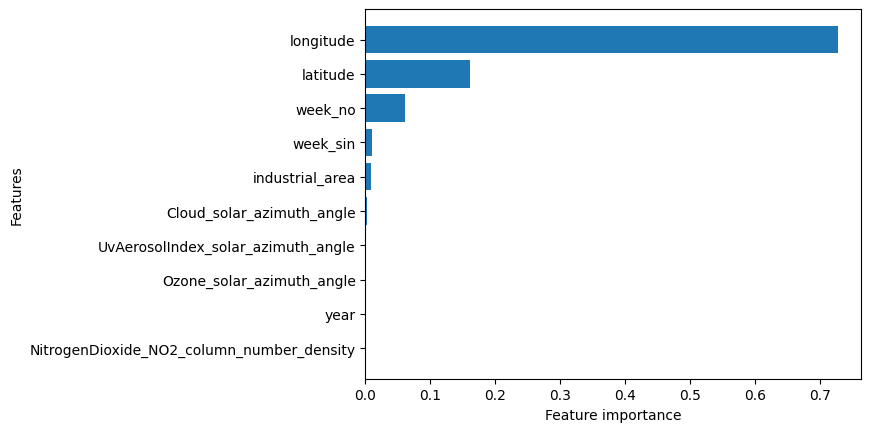

In [ ]:
plot_features(test_df.columns, gs_rfr.feature_importances_)

Conclusion:
As we can see the most important features are longitude and latitude.